# Skyproj HealSparse and Healpix Mapping

In this section, we explore plotting healsparse and healpix maps with skyproj.

In [1]:
# Set interactive plots
%matplotlib notebook

# Import required code
import matplotlib.pyplot as plt
import numpy as np
import healsparse as hsp
import healpy as hp

# Import skyproj
import skyproj

# Reset any matplotlib parameters to defaults for testing
plt.rcParams.update(plt.rcParamsDefault)

`skyproj` was primarily developed to be able to make high resolution, performant, interactive plots of `healpix` and `healsparse` maps.  All map plotting is performed by _rasterizing_ the input map to ensure that the plotting is well-matched to the resolution of the figure.  This avoids having to plot millions of unnecessary and invisible pixels when a high resolution map is plotted over a significant fraction of the sky.  However, when a map is zoomed in (either via creating the map with a small extent, or by interactive zooming), the plotting will be rasterized such like the appropriate resolution is shown at that zoom level.

The examples here are primarily focused on [HealSparse](https://readthedocs.org/projects/healsparse/) because of its significantly lower memory footprint for high resolution maps over large areas as compared to `healpy`. 

In [2]:
# Let us create a high resolution healsparse map with a noise field
hspmap = hsp.HealSparseMap.make_empty(32, 4096, np.float32)
poly = hsp.geom.Polygon(ra=[0.0, 20.0, 20.0, 0.0], dec=[0.0, 0.0, 20.0, 20.0], value=1.0)
pixels = poly.get_pixels(nside=hspmap.nside_sparse)
hspmap[pixels] = np.random.normal(size=pixels.size).astype(np.float32)
# Add in a central square of fixed value.
poly2 = hsp.geom.Polygon(ra=[10, 10.2, 10.2, 10.0], dec=[10, 10.0, 10.2, 10.2], value=3.0)
pixels2 = poly2.get_pixels(nside=hspmap.nside_sparse)
hspmap[pixels2] = 3.0

<IPython.core.display.Javascript object>


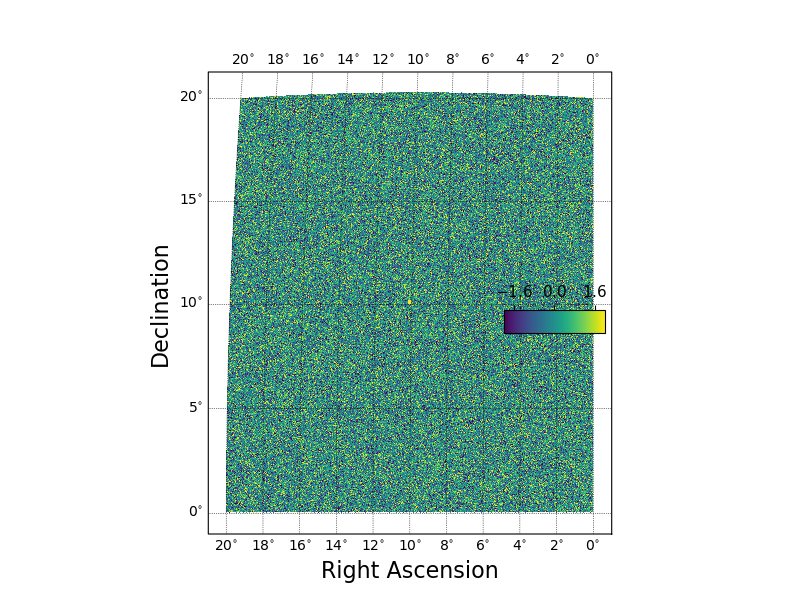

In [3]:
fig = plt.figure(1, figsize=(8, 6))
fig.clf()
ax = fig.add_subplot(111)
sp = skyproj.McBrydeSkyproj(ax=ax)
# Note that the default is to zoom in to the range defined by the map
_ = sp.draw_hspmap(hspmap)
sp.draw_inset_colorbar()
plt.show()
# And you can zoom in on this map and it will re-render at higher resolution until you hit the 
# resolution of the native map, in which case you see the nside=4096 pixels themselves.

<IPython.core.display.Javascript object>


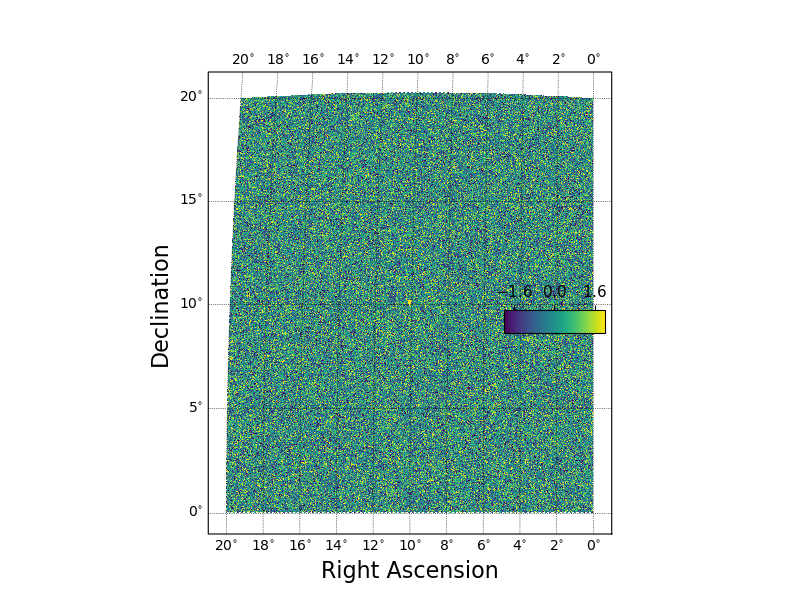

In [4]:
# You can do the same thing with a regular healpy map (though less memory efficiently!)
hpxmap = hspmap.generate_healpix_map()
fig = plt.figure(2, figsize=(8, 6))
fig.clf()
ax = fig.add_subplot(111)
sp = skyproj.McBrydeSkyproj(ax=ax)
# Note that the default is to zoom in to the range defined by the map
_ = sp.draw_hpxmap(hpxmap, nest=True)
sp.draw_inset_colorbar()
plt.show()

<IPython.core.display.Javascript object>


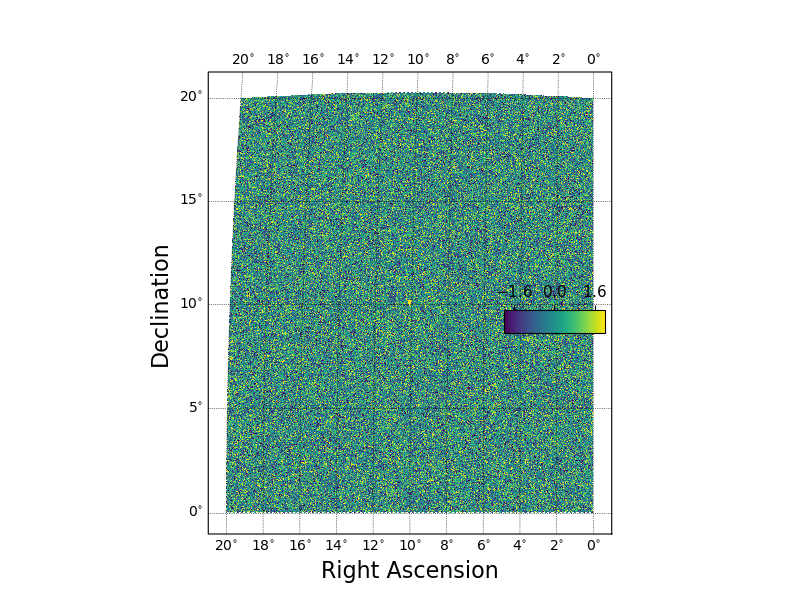

In [5]:
# We can also plot by pixel numbers and values
# However, the re-rendering on zoom does not work in this mode, so using a healsparse map is 
# recommended.
fig = plt.figure(3, figsize=(8, 6))
fig.clf()
ax = fig.add_subplot(111)
sp = skyproj.McBrydeSkyproj(ax=ax)
# Note that the default is to zoom in to the range defined by the map
pix = hspmap.valid_pixels
_ = sp.draw_hpxpix(hspmap.nside_sparse, pix, hspmap[pix], nest=True)
sp.draw_inset_colorbar()
plt.show()

One of the advantages of healsparse is that we can make very high resolution maps that are not at all practical with healpy because of the full-sky requirement.

In [6]:
hspmap = hsp.HealSparseMap.make_empty(32, 32768, np.float32)
poly = hsp.geom.Polygon(ra=[0.0, 20.0, 20.0, 0.0], dec=[0.0, 0.0, 20.0, 20.0], value=1.0)
pixels = poly.get_pixels(nside=hspmap.nside_sparse)
hspmap[pixels] = np.random.normal(size=pixels.size).astype(np.float32)
# This is a smaller square that will be more fun to zoom into!
poly2 = hsp.geom.Polygon(ra=[10, 10.05, 10.05, 10.0], dec=[10, 10.0, 10.05, 10.05], value=3.0)
pixels2 = poly2.get_pixels(nside=hspmap.nside_sparse)
hspmap[pixels2] = 3.0

For this final plot test, we will change the colormap to show how to do that.

<IPython.core.display.Javascript object>


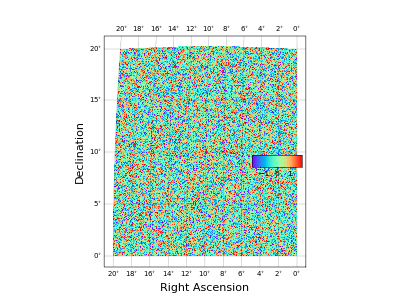

In [8]:
fig = plt.figure(4, figsize=(8, 6), dpi=50.0)
fig.clf()
ax = fig.add_subplot(111)
sp = skyproj.McBrydeSkyproj(ax=ax)
# Note that the default is to zoom in to the range defined by the map
_ = sp.draw_hspmap(hspmap, cmap=plt.colormaps['rainbow'])
# Make a magenta point at the center of the square so you can find it!
sp.plot([10.025], [10.025], 'm.')
sp.draw_inset_colorbar()
plt.show()